# 2020.07.11 머신러닝 알고리즘 스터디
# Locally Linear Embedding (LLE)
# 지역적 선형 임베딩

## Connect to Google Drive

In [54]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive


## Load images

In [57]:
from PIL import Image
im1 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200711_pic/01.jpg")
im2 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200711_pic/02.jpg")
im3 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200711_pic/03.jpg")
im4 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200711_pic/04.jpg")
im5 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200711_pic/05.jpg")

## 1. 차원 축소의 필요성

- 머신러닝의 많은 알고리즘 : 정보를 고차원의 벡터로 저장
- 공간은 수백, 수십만 차원이 될 가능성이 있다.
- 해당 공간은 그대로 이해하기가 어렵다.
- 따라서, 고차원 공간을 2차원으로 압축하여 시각화하는 임베딩 방법이 사용된다.
- 대표적인 방벙은 다음과 같다.
1. t-SNE : 안정적인 성능, 2008 제안.
비슷한 데이터는 가까이, 비슷하지 않은 데이터는 멀리 떨어지도록 차원 축소.
2. MDS : 1964 제안, 데이터 포인트 간의 거리를 보존하며 차원을 축소
3. LLE : nearest neighbors 정보를 이용. 2000 제안.
4. ISOMAP : nearest neighbors 정보를 이용. 2000 제안.
각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수인 geodesic distance를 유지하며 차원 축소.
5. PCA
6. kPCA (Kernel PCA)

## 2. LLE (Locally Linear Embedding)

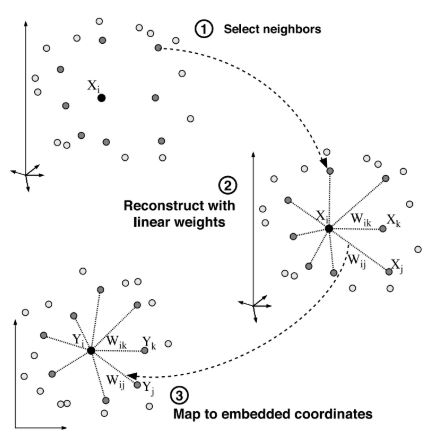

In [ ]:
im1

#### LLE의 과정은 크게 세 단계로 나눌 수 있다.
1. Step 1 : Select neighbors (이웃 선택)
2. Step 2 : Reconstruct with linear weights (선형 가중치 고려)
3. Step 3 : Map to embedded coordinates (임베드된 좌표계로 맵핑)

### STEP 1 : Select neighbors

- 원래 공간에서 모든 점들에 대해 k 개의 nearest neighbors를 찾는다(k-nearest neighbors).
- k : hyper-parameter (사람이 직접 적절한 갯수 지정)
- knn과 비슷한 방식으로 수행.

### STEP 2 : Reconstruct with linear weights

- 'STEP 1' 에서 선택한 각 데이터 포인트, 이와 가까운 k 개의 이웃점들은 매니폴드의 locally linear pathch 상에 있거나 가까이 있을 것이라 가정한다.

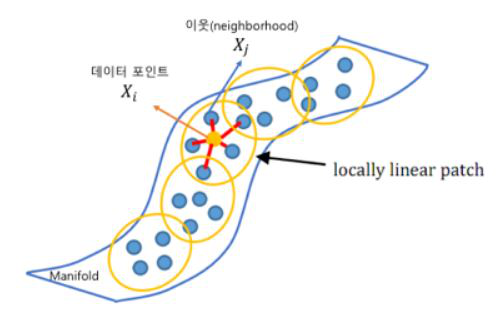

In [ ]:
im2

- 해당 데이터 포인터들과 k 개의 이웃들의 거리르 바탕으로 데이터 포인틀를 가장 잘  재구성(reconstruction)하는 가중치 w를 구한다.
- 데이터 포인트 x에 대해, wx 와 x는 오차가 최소화되어야 한다.

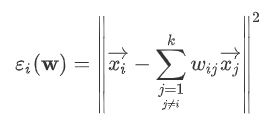

In [56]:
im3

- 따라서, 위의 식에서 Ei(w)를 최소화하는 (minimize) 문제이다.
- 이 때 제약식은 w_ij의 합은 1이다.

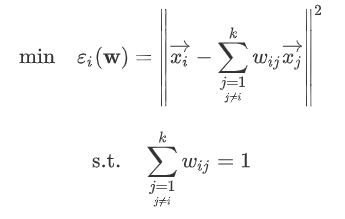

In [58]:
im4

### STEP 3 : Map to Embedded Coordinates

- STEP 2에서 구한 가중치 w_ij는 데이터 포인트 x와 이웃점들 간의 지역 선형 상관관계(locally linear relationship)를 나타낸다.
- STEP 3에서는 이러한 관계가 최대한 보존되도록 데이터를 저차원인 d-차원 공간으로 매핑(mapping)한다.

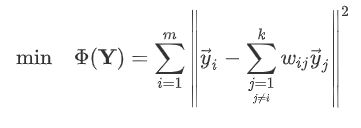

In [59]:
im5

- y_i : 저차원인 d-차원 공간에서의 상
- y_j : d-차원 공간에서의 이웃점들
- 둘사이의 거리를 최소화하는 Y를 찾는 최소화 문제

## 3. Scikit-Learn을 활용한 예제

In [69]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt


# create sample dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(X)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
                       random_state=42, reg=0.001, tol=1e-06)

In [70]:
LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=10, neighbors_algorithm='auto',
            random_state=42, reg=0.001, tol=1e-06)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='standard', modified_tol=1e-12, n_components=2,
                       n_jobs=1, n_neighbors=10, neighbors_algorithm='auto',
                       random_state=42, reg=0.001, tol=1e-06)

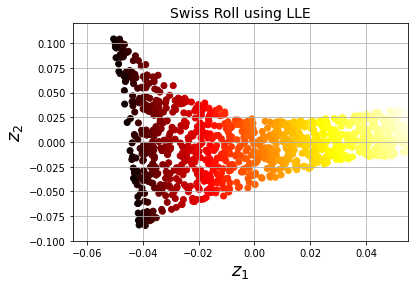

In [72]:
X_reduced = lle.transform(X)

plt.title("Swiss Roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()


## 4. 한계점

- 매핑의 복잡도가 심하므로, 대용량 데이터셋에 적용하기는 어려운 한계점이 존재한다.

## Reference
- https://excelsior-cjh.tistory.com/168 <br>
- https://lovit.github.io/nlp/representation/2018/09/28/mds_isomap_lle/ <br>